In [1]:
using Multilane
using POMDPModelTools
using POMDPs
using POMDPPolicies
using POMDPSimulators
using Random
using MCTS

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-210800991194326392\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10774981071294076212\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-210800991194326392\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [5]:
#Set up problem configuration
nb_lanes = 4
pp = PhysicalParam(nb_lanes,lane_length=100.) #2.=>col_length=8
_discount = 1.
nb_cars=10

rmodel = NoCrashRewardModel()

dmodel = NoCrashIDMMOBILModel(nb_cars, pp)

mdp = NoCrashMDP{typeof(rmodel), typeof(dmodel.behaviors)}(dmodel, rmodel, _discount, true);

rng = MersenneTwister(5)

s = rand(rng, initialstate(mdp))
# @show s.env_cars[1]
#visualize(mdp,s,MLAction(0,0))

policy = RandomPolicy(mdp)

sim = HistoryRecorder(rng=rng, max_steps=100) # initialize a random number generator

hist = simulate(sim, mdp, policy, s);

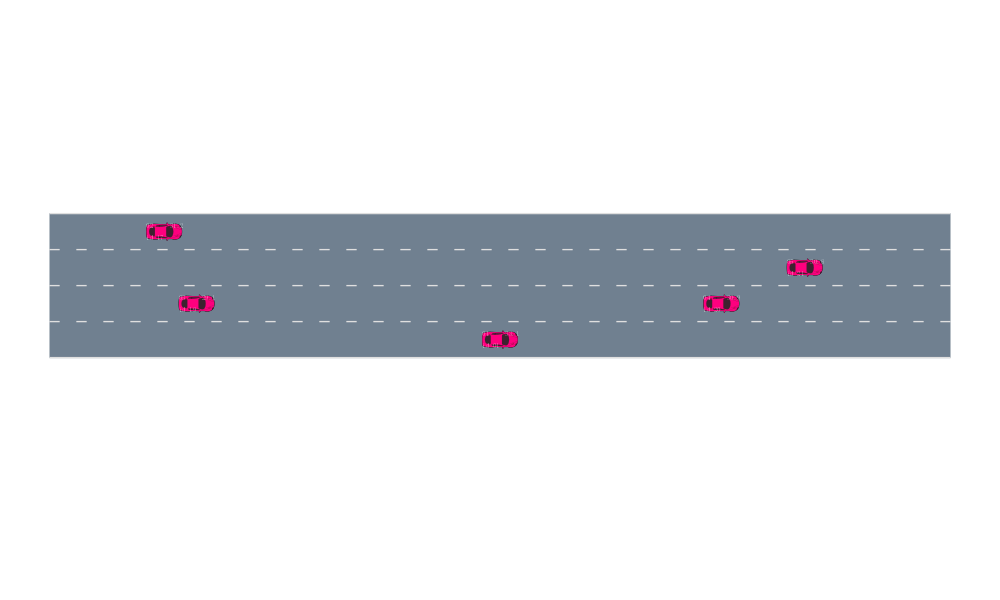

In [3]:
s = state_hist(hist)[1]
a = first(action_hist(hist))
sp = state_hist(hist)[2]
Multilane.visualize(mdp, s, a, sp)
# savefig("scene_1.pdf")